Autosave disabled


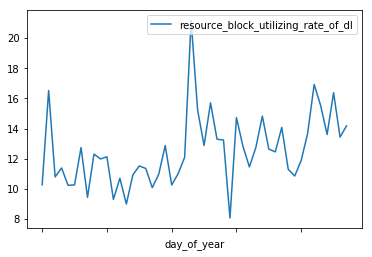

In [44]:
from pandas import read_csv
from pandas import datetime
from pandas import *
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math
import numpy
import warnings
%autosave 0
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')


df = read_csv('arima-test-daily2.csv', index_col=False, header=0, squeeze=True)
df = df.sort_values(['day_of_year'])
df.set_index('day_of_year',inplace=True)
del df['cell_name']
del df['week_number']
df.plot()





In [45]:
df

,resource_block_utilizing_rate_of_dl
day_of_year,
2018-11-01,10.260
2018-11-02,16.524
2018-11-03,10.786
2018-11-04,11.378
2018-11-05,10.226
2018-11-06,10.254
2018-11-07,12.734
2018-11-08,9.432
2018-11-09,12.302


In [20]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

0    10.260
1    16.524
2    10.786
3    11.378
4    11.978
5    12.302
6     9.432
7    12.124
8    10.254
9    10.226
Name: resource_block_utilizing_rate_of_dl, dtype: float64


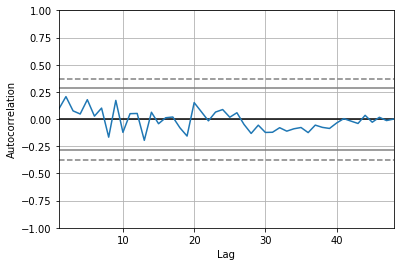

In [110]:
print(df.head(10))
autocorrelation_plot(df)
pyplot.show()

In [111]:
model = ARIMA(df, order=(0,1,1))

In [112]:
result = model.fit()

In [117]:
result.

AttributeError: 'ARIMAResults' object has no attribute 'plot_diagnostics'

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   47
Model:                     ARMA(0, 5)   Log Likelihood                 -73.407
Method:                       css-mle   S.D. of innovations              1.092
Date:                Thu, 07 Feb 2019   AIC                            160.814
Time:                        15:06:12   BIC                            173.765
Sample:                             0   HQIC                           165.688
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3863      0.161     33.500      0.000       5.071       5.701
ma.L1.y       -0.3021      0.296     -1.020      0.314      -0.882       0.278
ma.L2.y        0.4720      0.617      0.765      0.4

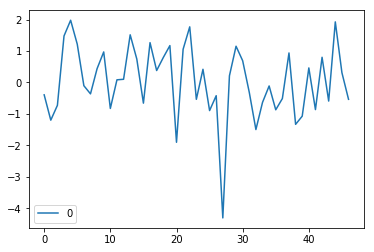

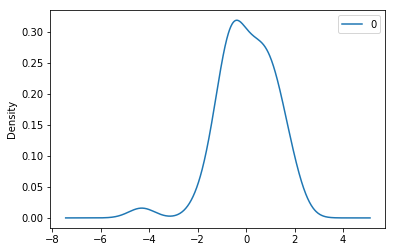

               0
count  47.000000
mean    0.024748
std     1.160694
min    -4.307042
25%    -0.646922
50%     0.082812
75%     0.868072
max     1.976691


In [41]:
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals = residuals.reset_index(drop=True)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [24]:
model = ARIMA(df, order=(1,1,1))
print(model)

predicted=13.479490, expected=12.826000
predicted=13.331267, expected=11.448000
predicted=13.049327, expected=12.744000
predicted=13.185548, expected=14.826000
predicted=13.619394, expected=12.634000
predicted=13.402547, expected=12.450000
predicted=13.342443, expected=14.074000
predicted=13.611468, expected=11.288000
predicted=13.239412, expected=10.846000
predicted=12.958057, expected=11.884000
predicted=12.983906, expected=13.686000
predicted=13.286708, expected=16.924000
predicted=14.047004, expected=15.530000
predicted=14.131166, expected=13.604000
predicted=13.877169, expected=16.378000
predicted=14.505071, expected=13.430000
predicted=14.111721, expected=14.176000
Test MSE: 2.651
17 predictions


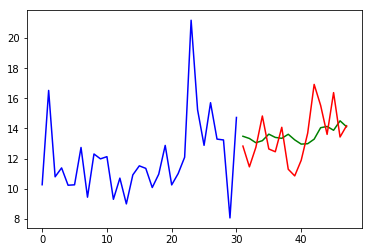

In [101]:
series = read_csv('arima-test-daily2.csv', index_col=False, header=0, squeeze=True)
series = series.sort_values(['day_of_year'])
series.set_index('day_of_year',inplace=True)
del series['cell_name']
del series['week_number']
X = series.values
size = int(len(df) * 0.66)
train, test = X[0:size], X[size:len(df)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast(steps=1)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


# pyplot.plot(test, color='red')
pyplot.plot(train, color='blue')
x = []
print(len(predictions), 'predictions')
for i in range(48-31):
    x.append(i+31)
pyplot.plot(x,predictions, color='green')
pyplot.plot(x,test, color='red')
pyplot.show()

In [31]:
# df = read_csv('arima-test-daily2.csv', index_col=False, header=0, squeeze=True)
# df = df.sort_values(['week_number'])
# df = df['resource_block_utilizing_rate_of_dl']
# df = df.reset_index(drop=True)
df = read_csv('arima-test-daily2.csv', index_col=False, header=0, squeeze=True)
df.set_index('day_of_year',inplace=True)
del df['cell_name']
del df['week_number']
size = int(len(df) * 0.66)
print(size)
# train = df
# test = df
train, test = df[0:size], df[size:len(df)]
# load dataset
# evaluate parameters
p_values = [0, 1]
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

31
ARIMA(0, 0, 0) MSE=14.332
ARIMA(0, 0, 1) MSE=15.428
ARIMA(0, 0, 2) MSE=15.558
ARIMA(0, 0, 3) MSE=19.378
ARIMA(0, 0, 4) MSE=21.827
ARIMA(0, 1, 0) MSE=20.576
ARIMA(0, 1, 1) MSE=14.757
ARIMA(0, 2, 0) MSE=53.425
ARIMA(0, 2, 1) MSE=22.633
ARIMA(1, 0, 0) MSE=15.388
ARIMA(1, 0, 1) MSE=15.550
ARIMA(1, 1, 0) MSE=18.321
ARIMA(1, 1, 1) MSE=15.918
ARIMA(1, 2, 0) MSE=39.354
Best ARIMA(0, 0, 0) MSE=14.332


In [106]:
df = read_csv('arima-test-hourly1.csv', index_col=False, header=0, squeeze=True)
print(df.head(1))
df = df.sort_values(['date', 'time'])
df.set_index('datetime',inplace=True)
del df['cell_name']

df.plot()


     cellname  btrim        date  time     datetime
0  MAL2029_22   8.08  2019-01-01     0  01/01/19 00


KeyError: 'cell_name'

In [225]:
print(forecast)

[3.82985867 4.89090664 4.89090664]
